# PAP2 V255: Röntgenspektrometer

In [15]:
#Importieren von allen benötigten Modulen

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import io #Für ersetzen der Komma durch Punkte
from scipy.stats import chi2 #Für Fitgüte

Aufgabe 1:


a) Extrapolieren sie den einigermaßen geraden Anstieg am kurzwelligen Ende bis zum Untergrund. Versehen Sie die betreffenden Punkte mit statisti- schen Fehlern. Bestimmen Sie so die Grenzwellenla ̈nge des Bremsspek- trums von 35 kV und daraus die Plank’sche Konstante h. Berechnen Sie aus der Stelle des Beginns des Spektrums, ab welchen Winkel das Spek- trum zweiter Ordnung einsetzt.

b) Tragen Sie die Za ̈hlrate als Funktion des Winkels β fu ̈r die vier Linien auf und bestimmen sie die Wellenla ̈nge von Kα und Kβ aus den Messungen in beiden Ordnungen. Bestimmen Sie fu ̈r Kα in erster Ordnung die Halb- wertsbreite (Breite der Linie in halber Ho ̈he).
Dichte Molekulargewicht Netzebenenabstand

c) Bestimmen Sie durch Extrapolation die Einsatzspannung, d.h. die Span- nung, oberhalb der es Quanten gibt, deren Wellenla ̈nge zu β = 7,5◦ geho ̈rt. Berechnen Sie aus diesem Wert wieder h. Theoretisch ist diese sog. Iso- chromatenmethode, die hier zur h Bestimmung benutzt wird, der Extrapo- lation des kurzwelligen Endes des Spektrums in Aufgabe 2a) a ̈quivalent. Die Spektrumsextrapolation ist aber in der Praxis ungenauer, da dort Messpunkte unterschiedlicher Wellenla ̈nge benutzt werden, die individuell z.B. auf Eigenabsorption in der Anode, dem Ro ̈hrenfenster usw. sowie auf das unterschiedliche Reflexionsvermo ̈gen des Kristalls korrigiert werden mu ̈ssten.

Aufgabe 2: 


Ermitteln Sie aus dem Spektrum die Lage der Kα und Kβ-Linien und berechnen Sie mit den in 1b) gewonnenen Wellenla ̈ngen fu ̈r Kα und Kβ die Gitterkonstante von NaCl sowie die Avogadro Zahl.



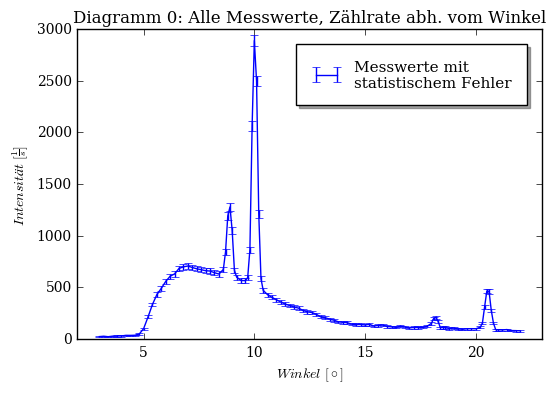

In [2]:
#Einlesen der Daten aus LiF.txt für LiF Kristall mit Fehler
daten = open('LiF_master.txt').read().replace(',','.')
angle, intensity = np.loadtxt(io.StringIO(daten), unpack=True)
#print (angle, intensity)
dintensity=np.sqrt(intensity)

plt.rcParams["font.family"]='serif'
plt.errorbar(angle, intensity, yerr=dintensity, label='Messwerte mit \nstatistischem Fehler')
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 0: Alle Messwerte, Zählrate abh. vom Winkel')
plt.axis((2, 23, 0, 3000))
plt.legend(borderpad=1, borderaxespad=1, loc='best', shadow='true', fontsize=11)


#plt.savefig('v255_0.pdf',format='pdf')

popt und perr des ersten Fits y = a + 0* x
[ 26.2] [ 1.5340578]
popt und perr des zweiten Fits y = b+c*x
[-2676.23999569   555.79999919] [ 98.68480906  18.60322576]
Untergrund= 26.2000000001 ± 1.53405779708
Fitgerade = b + c * x
b= -2676.23999569 ± 98.6848090553
c= 555.799999187 ± 18.6032257587
chisq= 0.449685478994
chisq_red= 0.224842739497
Fitwahrscheinlichkeit= 80.0 %


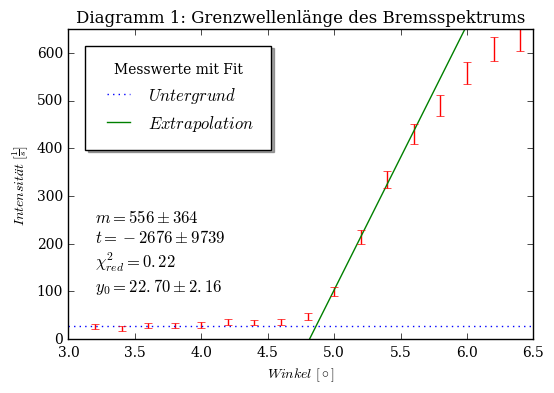

In [3]:
#Aufgabe 1a: Extrapolieren

#Winkelstücke definieren für spätere Fits
ang1=angle[1:5]
int1=intensity[1:5]

ang2=angle[10:14]
int2=intensity[10:14]
dint2=dintensity[10:14]

#Zwei Fitfunktionen, verschiedene Geraden
def linear1(x,a):
    return a + 0*x
popt, pcov = curve_fit(linear1, ang1, int1, p0=[1])
perr = np.sqrt(np.diag(pcov))

def linear2(x,b,c):
    return b+c*x
popt2,pcov2=curve_fit(linear2, ang2, int2)
perr2 = np.sqrt(np.diag(pcov2))


#Güte des Fits
chisq=np.sum((linear2(ang2,*popt2)-int2)**2/dint2**2)
dof=2
chisq_red=chisq/dof
prob=round(1-chi2.cdf(chisq,dof),2)*100

x=np.linspace(3,7,20)
y=np.linspace(4.7,6,20)

plt.plot(x,linear1(x,*popt),label="$Untergrund$",linestyle=':')
plt.plot(y,linear2(y,*popt2), label="$Extrapolation$")
plt.errorbar(angle[1:20], intensity[1:20],dintensity[1:20], linestyle='None')
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 1: Grenzwellenlänge des Bremsspektrums')
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='upper left', shadow='true')
plt.axis((3, 6.5, 0, 650))
plt.text(3.2,100,"$m=556\pm364$\n$t=-2676\pm9739$\n$\chi_{red}^{2}=0.22$\n$y_{0}=22.70\pm2.16$", fontsize=12)

print('popt und perr des ersten Fits y = a + 0* x')
print(popt, perr)
print('popt und perr des zweiten Fits y = b+c*x')
print(popt2, perr2)
print('Untergrund=',popt[0],'±',perr[0])
print('Fitgerade = b + c * x')
print('b=',popt2[0],'±',perr2[0])
print('c=',popt2[1],'±',perr2[1])
print('chisq=',chisq)
print('chisq_red=',chisq_red)
print('Fitwahrscheinlichkeit=',prob,'%')

#plt.savefig('v255_1.pdf',format='pdf')

/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  1.50197615e+04   8.87200015e+00   8.19598215e+00   5.80326269e+02]
[  8.37629240e+03   1.74164243e+00   2.28946548e+00   8.12862764e+02]
Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)
 
K_beta erster Ordnung:
Ab1= 15019.7614949 ± 1651.25201372
mub1= 8.87200014557 ± 0.00721658834433
sigb1= 8.1959821512 ± 0.809379644248
Ub1= 580.326269024 ± 41.1045032317
chisqb1= 6.37026897761
chisqb1_red= 2.12342299254
Fitwahrscheinlichkeitb1= 9.0 %
 
K_alpha erster Ordnung:
Aa1= 8376.29239736 ± inf
mua1= 1.74164242531 ± inf
siga1= 2.289465483 ± inf
Ua1= 812.862764165 ± inf
chisqa1= 4281.08511595
chisqa1_red= 1070.27127899
Fitwahrscheinlichkeita1= 0.0 %


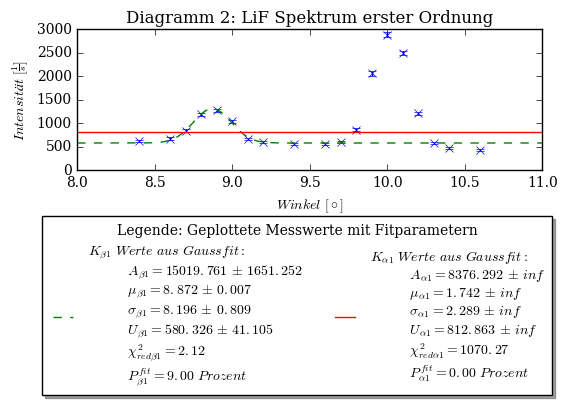

In [6]:
#Aufgabe 2b: Spektrum erster Ordnung von LiF
#Zählrate als Funktion des Winkels, bestimmen der Wellenlängen von Ka und Kb

#Fitfunktion für Peaks
def gauss(x, A, mu, sig,U):
    return U+(A/(sig*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2/2*sig**2))

#Auswählen des Spektrums erster Ordnung
ang3=angle[27:46]
int3=intensity[27:46]
dint3=dintensity[27:46]

#Gausskurven an die Peaks fitten
poptb1, pcovb1=curve_fit(gauss,ang3[1:8], int3[1:8], p0=[240,9,0.23,601], sigma=dint3[1:8])
popta1, pcova1=curve_fit(gauss,ang3[10:19], int3[10:19], p0=[756,10,0.2,440], sigma=dint3[10:19])
perrb1 = np.sqrt(np.diag(pcovb1))
perra1 = np.sqrt(np.diag(pcova1))
x3=np.linspace(8,11,200)

#Güte der Fits bestimmen:
#Güte Kbeta Linie
chisqb1=np.sum((gauss(ang3[1:8],*poptb1)-int3[1:8])**2/dint3[1:8]**2)
dofb1=3
chisqb1_red=chisqb1/dofb1
probb1=round(1-chi2.cdf(chisqb1,dofb1),2)*100

#Güte Kalpha Linie
chisqa1=np.sum((gauss(ang3[10:19],*popta1)-int3[10:19])**2/dint3[10:19]**2)
dofa1=4
chisqa1_red=chisqa1/dofa1
proba1=round(1-chi2.cdf(chisqa1,dofa1),2)*100


#Plotten der Punkte und des Fits

plt.subplot(211)
plt.errorbar(ang3, int3,yerr=dint3, linestyle='none', marker='x')
plt.plot(x3, gauss(x3, *poptb1), linestyle='--', 
         label='$K_{\\beta1}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\beta1}=%.3f$ $\\pm$ $ %.3f$ \n\
         $\\mu_{\\beta1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\sigma_{\\beta1}=%.3f$ $\\pm$ $%.3f$ \n\
         $U_{\\beta1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\chi_{red\\beta1}^{2}=%.2f$ \n\
         $P_{\\beta1}^{fit}=%.2f\ Prozent$'
         %(poptb1[0], perrb1[0], poptb1[1], perrb1[1], poptb1[2], perrb1[2], poptb1[3], perrb1[3], chisqb1_red, probb1)) 

plt.plot(x3, gauss(x3, *popta1), 
         label='$K_{\\alpha1}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\alpha1}=%.3f$ $\\pm$ $ %.3f$ \n\
         $\\mu_{\\alpha1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\sigma_{\\alpha1}=%.3f$ $\\pm$ $%.3f$ \n\
         $U_{\\alpha1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\chi_{red\\alpha1}^{2}=%.2f$ \n\
         $P_{\\alpha1}^{fit}=%.2f\ Prozent$'
         %(popta1[0], perra1[0], popta1[1], perra1[1], popta1[2], perra1[2], popta1[3], perra1[3], chisqa1_red, proba1)) 


plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 2: LiF Spektrum erster Ordnung')
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende: Geplottete Messwerte mit Fitparametern', borderpad=0.5, borderaxespad=3.3, shadow='true', fontsize=10, bbox_to_anchor=(1.12, 0), loc='upper right', ncol=2)
#plt.axis((3, 6.2, 0, 600))

#Ausgeben der rohen Werte
print (poptb1)
print (popta1)
print('Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)')
print(' ')
print('K_beta erster Ordnung:')
print('Ab1=',poptb1[0],'±',perrb1[0])
print('mub1=',poptb1[1],'±',perrb1[1])
print('sigb1=',poptb1[2],'±',perrb1[2])
print('Ub1=',poptb1[3],'±',perrb1[3])
print('chisqb1=',chisqb1)
print('chisqb1_red=',chisqb1_red)
print('Fitwahrscheinlichkeitb1=',probb1,'%')
print(' ')
print('K_alpha erster Ordnung:')
print('Aa1=',popta1[0],'±',perra1[0])
print('mua1=',popta1[1],'±',perra1[1])
print('siga1=',popta1[2],'±',perra1[2])
print('Ua1=',popta1[3],'±',perra1[3])
print('chisqa1=',chisqa1)
print('chisqa1_red=',chisqa1_red)
print('Fitwahrscheinlichkeita1=',proba1,'%')

#plt.savefig('v255_2.pdf',format='pdf')

[  31.77090481   18.16244488    0.23071432  107.25387875]
[ 129.95125085   20.54309141    0.25876487   90.27399811]
Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)
 
K_beta zweiter Ordnung:
Ab2= 31.7709048138 ± 4.35835845694
mub2= 18.1624448804 ± 0.0106471662622
sigb2= 0.230714321995 ± 0.0268567431227
Ub2= 107.25387875 ± 6.0456835589
chisqb2= 1.80124578771
chisqb2_red= 0.450311446928
Fitwahrscheinlichkeitb2= 77.0 %
 
K_alpha zweiter Ordnung:
Aa2= 129.951250846 ± 6.78996233517
mua2= 20.5430914051 ± 0.00410356900244
siga2= 0.258764866768 ± 0.0116193426151
Ua2= 90.2739981088 ± 8.00525344798
chisqa2= 2.71857058961
chisqa2_red= 0.679642647401
Fitwahrscheinlichkeita2= 61.0 %


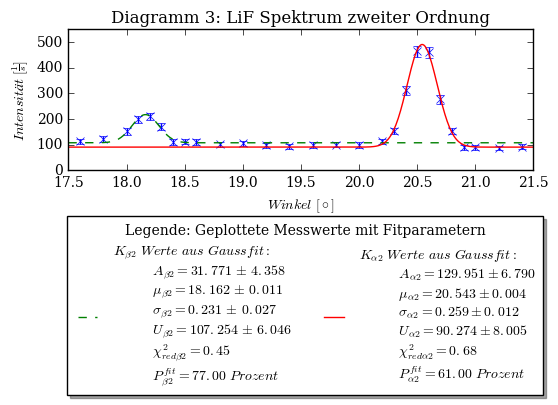

In [25]:
#Aufgabe 2b: Spektrum zweiter Ordnung von LiF
#Zählrate als Funktion des Winkels, bestimmen der Wellenlängen von Ka und Kb

#Auswählen des Spektrums zweiter Ordnung
ang4=angle[80:109]
int4=intensity[80:109]
dint4=dintensity[80:109]

#Gausskurven an die Peaks fitten
poptb2, pcovb2=curve_fit(gauss,ang4[2:9], int4[2:9],p0=[29,18,0.2,110], sigma=dint4[2:9], maxfev=5000)
popta2, pcova2=curve_fit(gauss,ang4[16:24], int4[16:24], p0=[130,20,0.25,90], sigma=dint4[16:24], maxfev=5000)
perrb2 = np.sqrt(np.diag(pcovb2))
perra2 = np.sqrt(np.diag(pcova2))
x4=np.linspace(17.5,21.5,400)

#Güte der Fits bestimmen:
#Güte Kbeta Linie
chisqb2=np.sum((gauss(ang4[2:9],*poptb2)-int4[2:9])**2/dint4[2:9]**2)
dofb2=4
chisqb2_red=chisqb2/dofb2
probb2=round(1-chi2.cdf(chisqb2,dofb2),2)*100

#Güte Kalpha Linie
chisqa2=np.sum((gauss(ang4[16:24],*popta2)-int4[16:24])**2/dint4[16:24]**2)
dofa2=4
chisqa2_red=chisqa2/dofa2
proba2=round(1-chi2.cdf(chisqa2,dofa2),2)*100


#Plotten der Punkte und des Fits

plt.subplot(211)
plt.errorbar(ang4, int4,yerr=dint4, linestyle='none', marker='x')

plt.plot(x4, gauss(x4, *poptb2), linestyle='--', 
         label='$K_{\\beta2}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\beta2}=%.3f$ $\\pm$ $ %.3f$ \n\
         $\\mu_{\\beta2}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\sigma_{\\beta2}=%.3f$ $\\pm$ $%.3f$ \n\
         $U_{\\beta2}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\chi_{red\\beta2}^{2}=%.2f$ \n\
         $P_{\\beta2}^{fit}=%.2f\ Prozent$' 
         %(poptb2[0], perrb2[0], poptb2[1], perrb2[1], poptb2[2], perrb2[2], poptb2[3], perrb2[3], chisqb2_red, probb2)) 

plt.plot(x4, gauss(x4, *popta2), 
         label='$K_{\\alpha2}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\alpha2}=%.3f\pm%.3f$ \n\
         $\\mu_{\\alpha2}=%.3f\pm%.3f$ \n\
         $\\sigma_{\\alpha2}=%.3f\pm%.3f$ \n\
         $U_{\\alpha2}=%.3f\pm%.3f$ \n\
         $\\chi_{red\\alpha2}^{2}=%.2f$ \n\
         $P_{\\alpha2}^{fit}=%.2f\ Prozent$' 
         %(popta2[0], perra2[0], popta2[1], perra2[1], popta2[2], perra2[2], popta2[3], perra2[3], chisqa2_red, proba2)) 

plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 3: LiF Spektrum zweiter Ordnung')
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende: Geplottete Messwerte mit Fitparametern', borderpad=0.5, borderaxespad=3.3, shadow='true', fontsize=10, bbox_to_anchor=(1.12, 0), loc='upper right', ncol=2)
plt.axis((17.5, 21.5, 0, 550))

#Ausgeben der rohen Werte
print (poptb2)
print (popta2)
print('Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)')
print(' ')
print('K_beta zweiter Ordnung:')
print('Ab2=',poptb2[0],'±',perrb2[0])
print('mub2=',poptb2[1],'±',perrb2[1])
print('sigb2=',poptb2[2],'±',perrb2[2])
print('Ub2=',poptb2[3],'±',perrb2[3])
print('chisqb2=',chisqb2)
print('chisqb2_red=',chisqb2_red)
print('Fitwahrscheinlichkeitb2=',probb2,'%')
print(' ')
print('K_alpha zweiter Ordnung:')
print('Aa2=',popta2[0],'±',perra2[0])
print('mua2=',popta2[1],'±',perra2[1])
print('siga2=',popta2[2],'±',perra2[2])
print('Ua2=',popta2[3],'±',perra2[3])
print('chisqa2=',chisqa2)
print('chisqa2_red=',chisqa2_red)
print('Fitwahrscheinlichkeita2=',proba2,'%')

#plt.savefig('v255_3master.pdf',format='pdf')



popt und perr des ersten Fits y = a + 0* x
[-1241.83692262    55.5816808 ] [ 1.5340578]
popt und perr des zweiten Fits y = b+c*x
[-1241.83692262    55.5816808 ] [ 34.05673376   1.24172837]
Untergrund= -1241.83692262 ± 1.53405779708
Fitgerade = b + c * x
b= -1241.83692262 ± 34.0567337578
c= 55.5816808041 ± 1.24172836678
chisq= 7.57806513013
chisq_red= 0.68891501183
Fitwahrscheinlichkeit= 75.0 %


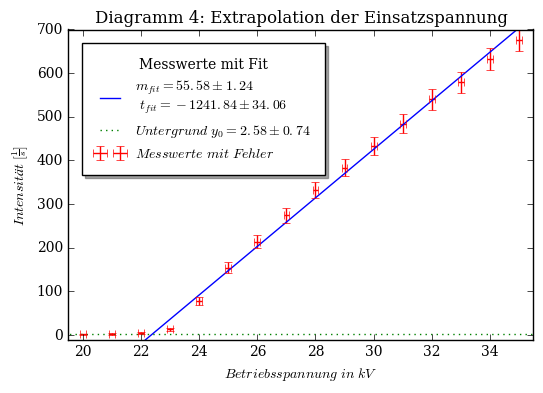

In [31]:
#Aufgabe 1c: Einsatzspannung

#Daten einlesen
U, R = np.loadtxt('tab1.txt', skiprows=1, usecols=(0, 1), unpack=True)
dR=np.sqrt(R)
x=np.linspace(18,36,100)

#Zwei Fitfunktionen, verschiedene Geraden
def linear1(x,a):
    return a + 0*x
popt1, pcov1 = curve_fit(linear1, U[0:3],R[0:3],sigma=dR[0:3])
perr1 = np.sqrt(np.diag(pcov1))

def linear2(x,b,c):
    return b+c*x
popt2,pcov2=curve_fit(linear2, U[4:16],R[4:16],sigma=dR[4:16:1])
perr2 = np.sqrt(np.diag(pcov2))


#Güte des Fits
chisq1=np.sum((linear1(U[0:3],*popt1)-U[0:3])**2/dR[0:3]**2)
dof1=3
chisq_red1=chisq/dof1
prob1=round(1-chi2.cdf(chisq1,dof1),2)*100

chisq2=np.sum((linear2(U[4:16],*popt2)-U[4:16])**2/dR[4:16]**2)
dof2=11
chisq_red2=chisq/dof2
prob2=round(1-chi2.cdf(chisq2,dof2),2)*100




plt.plot(x,linear(x,*popt2), label='$m_{fit}=%.2f \pm%.2f$ \n $t_{fit}=%.2f \pm%.2f$' %(popt2[1], perr2[1], popt2[0], perr2[0]))
plt.plot(x,linear1(x,*popt1),label="$Untergrund\ y_{0}=%.2f \pm%.2f$" %(popt1[0], perr1[0]),linestyle=':')
plt.errorbar(U,R,dR,0.1,linestyle='None', label='$Messwerte\ mit\ Fehler$')
plt.xlabel('$Betriebsspannung\ in\ kV$') 
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 4: Extrapolation der Einsatzspannung')
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='upper left', shadow='true', fontsize=10)
plt.rcParams["font.family"]='serif'
plt.axis((19.5, 35.5, -10, 700))

print('popt und perr des ersten Fits y = a + 0* x')
print(popt, perr)
print('popt und perr des zweiten Fits y = b+c*x')
print(popt2, perr2)
print('Untergrund=',popt[0],'±',perr[0])
print('Fitgerade = b + c * x')
print('b=',popt2[0],'±',perr2[0])
print('c=',popt2[1],'±',perr2[1])
print('chisq=',chisq)
print('chisq_red=',chisq_red)
print('Fitwahrscheinlichkeit=',prob,'%')


#plt.savefig('v255_4.pdf',format='pdf')

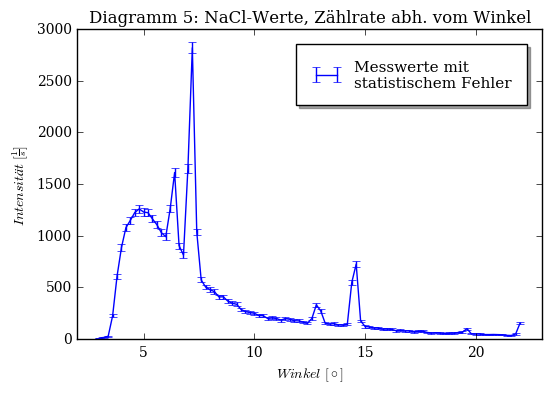

In [34]:
#Aufgabe 2: Lage der K_alpha und K_beta Linien aus NaCl Spektrum bestimmen

#Erstmal Daten plotten :D

#Einlesen der Daten aus NaCl.txt für NaCl Kristall mit Fehler
daten = open('NaCl.txt').read().replace(',','.')
angle, intensity = np.loadtxt(io.StringIO(daten), unpack=True)
#print (angle, intensity)
dintensity=np.sqrt(intensity)

plt.rcParams["font.family"]='serif'
plt.errorbar(angle, intensity, yerr=dintensity, label='Messwerte mit \nstatistischem Fehler')
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 5: NaCl-Werte, Zählrate abh. vom Winkel')
plt.axis((2, 23, 0, 3000))
plt.legend(borderpad=1, borderaxespad=1, loc='best', shadow='true', fontsize=11)


#plt.savefig('v255_5.pdf',format='pdf')



/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  6.95933485e+03  -9.89736380e-01   3.06920214e+00   1.04990930e+03]
[  1.00825593e+05  -5.51323846e+00   2.10947175e+01   1.26680060e+03]
Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)
 
K_beta erster Ordnung:
Ab1= 6959.33484847 ± inf
mub1= -0.989736379572 ± inf
sigb1= 3.06920213598 ± inf
Ub1= 1049.90929752 ± inf
chisqb1= 327.453512946
chisqb1_red= 163.726756473
Fitwahrscheinlichkeitb1= 0.0 %
 
K_alpha erster Ordnung:
Aa1= 100825.592678 ± inf
mua1= -5.5132384616 ± inf
siga1= 21.0947175199 ± inf
Ua1= 1266.80059599 ± inf
chisqa1= 1249.59762039
chisqa1_red= 624.798810195
Fitwahrscheinlichkeita1= 0.0 %


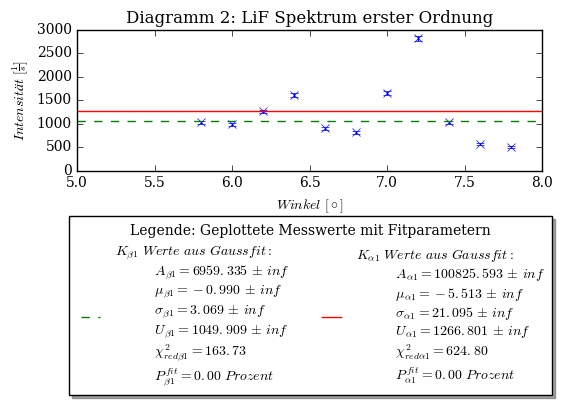

In [44]:
#NaCl Spektrum erster Ordnung

#Fitfunktion für Peaks
def gauss(x, A, mu, sig,U):
    return U+(A/(sig*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2/2*sig**2))

#Auswählen des Spektrums erster Ordnung
ang3=angle[14:25]
int3=intensity[14:25]
dint3=dintensity[14:25]

#Gausskurven an die Peaks fitten
poptb1, pcovb1=curve_fit(gauss,ang3[1:6], int3[1:6], p0=[540,6.4,0.23,901], sigma=dint3[1:6])
popta1, pcova1=curve_fit(gauss,ang3[5:9], int3[5:9], p0=[956,7.2,0.2,800], sigma=dint3[5:9])
perrb1 = np.sqrt(np.diag(pcovb1))
perra1 = np.sqrt(np.diag(pcova1))
x3=np.linspace(5,8,200)

#Güte der Fits bestimmen:
#Güte Kbeta Linie
chisqb1=np.sum((gauss(ang3[1:6],*poptb1)-int3[1:6])**2/dint3[1:6]**2)
dofb1=2
chisqb1_red=chisqb1/dofb1
probb1=round(1-chi2.cdf(chisqb1,dofb1),2)*100

#Güte Kalpha Linie
chisqa1=np.sum((gauss(ang3[5:9],*popta1)-int3[5:9])**2/dint3[5:9]**2)
dofa1=2
chisqa1_red=chisqa1/dofa1
proba1=round(1-chi2.cdf(chisqa1,dofa1),2)*100


#Plotten der Punkte und des Fits

plt.subplot(211)
plt.errorbar(ang3, int3,yerr=dint3, linestyle='none', marker='x')
plt.plot(x3, gauss(x3, *poptb1), linestyle='--', 
         label='$K_{\\beta1}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\beta1}=%.3f$ $\\pm$ $ %.3f$ \n\
         $\\mu_{\\beta1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\sigma_{\\beta1}=%.3f$ $\\pm$ $%.3f$ \n\
         $U_{\\beta1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\chi_{red\\beta1}^{2}=%.2f$ \n\
         $P_{\\beta1}^{fit}=%.2f\ Prozent$'
         %(poptb1[0], perrb1[0], poptb1[1], perrb1[1], poptb1[2], perrb1[2], poptb1[3], perrb1[3], chisqb1_red, probb1)) 

plt.plot(x3, gauss(x3, *popta1), 
         label='$K_{\\alpha1}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\alpha1}=%.3f$ $\\pm$ $ %.3f$ \n\
         $\\mu_{\\alpha1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\sigma_{\\alpha1}=%.3f$ $\\pm$ $%.3f$ \n\
         $U_{\\alpha1}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\chi_{red\\alpha1}^{2}=%.2f$ \n\
         $P_{\\alpha1}^{fit}=%.2f\ Prozent$'
         %(popta1[0], perra1[0], popta1[1], perra1[1], popta1[2], perra1[2], popta1[3], perra1[3], chisqa1_red, proba1)) 


plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 2: LiF Spektrum erster Ordnung')
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende: Geplottete Messwerte mit Fitparametern', borderpad=0.5, borderaxespad=3.3, shadow='true', fontsize=10, bbox_to_anchor=(1.12, 0), loc='upper right', ncol=2)
plt.axis((5, 8, 0, 3000))

#Ausgeben der rohen Werte
print (poptb1)
print (popta1)
print('Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)')
print(' ')
print('K_beta erster Ordnung:')
print('Ab1=',poptb1[0],'±',perrb1[0])
print('mub1=',poptb1[1],'±',perrb1[1])
print('sigb1=',poptb1[2],'±',perrb1[2])
print('Ub1=',poptb1[3],'±',perrb1[3])
print('chisqb1=',chisqb1)
print('chisqb1_red=',chisqb1_red)
print('Fitwahrscheinlichkeitb1=',probb1,'%')
print(' ')
print('K_alpha erster Ordnung:')
print('Aa1=',popta1[0],'±',perra1[0])
print('mua1=',popta1[1],'±',perra1[1])
print('siga1=',popta1[2],'±',perra1[2])
print('Ua1=',popta1[3],'±',perra1[3])
print('chisqa1=',chisqa1)
print('chisqa1_red=',chisqa1_red)
print('Fitwahrscheinlichkeita1=',proba1,'%')

#plt.savefig('v255_2.pdf',format='pdf')